# Predicting the Capital One Stock Price

Today we will be using a neural network to predict the price of the Capital One stock (COF) using data from 1994 up till today.

In [1]:
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For enhanced data visualization
import pandas as pd # For data manipulation
import numpy as np # For numerical operations
import tensorflow as tf # For building the neural network
import yfinance as yf  # For downloading stock data
from sklearn.preprocessing import MinMaxScaler # For feature scaling
from datetime import date # For handling date and time

In [2]:
# Get the current date
today = date.today()

# Format the date as YYYYMMDD
formatted_date = today.strftime("%Y-%m-%d")

In [3]:
df = yf.download("COF", start="1994-01-01", end=formatted_date) # Downloading the Capital One stock data from 1994 to today

/var/folders/hl/mtktwmzj3qg4lpdff4wh6j4c0000gn/T/ipykernel_76171/4190973676.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("COF", start="1994-01-01", end=formatted_date) # Downloading the Capital One stock data from 1994 to today
[*********************100%***********************]  1 of 1 completed


In [4]:
df.shape

(7733, 5)

In [5]:
if isinstance(df.columns, pd.MultiIndex): # Flatten MultiIndex columns if present
    df.columns = df.columns.get_level_values(0)

In [6]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [7]:
df = df.reset_index() # Resetting the index to have a clean DataFrame

In [8]:
# Convert the 'Date' column to datetime format
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop("Date", axis=1, inplace=True)

In [9]:
df

Price,Close,High,Low,Open,Volume,Year,Month,Day
0,3.750286,3.779586,3.750286,3.750286,8343900,1994,11,16
1,3.808883,3.808883,3.720986,3.750285,4872000,1994,11,17
2,3.867481,3.896781,3.808883,3.838182,1468800,1994,11,18
3,3.779584,3.896781,3.779584,3.896781,348600,1994,11,21
4,3.603792,3.779587,3.603792,3.750288,709800,1994,11,22
...,...,...,...,...,...,...,...,...
7728,210.789993,211.199997,207.720001,209.050003,2174800,2025,8,4
7729,212.000000,212.990005,208.580002,211.990005,3683600,2025,8,5
7730,212.880005,213.320007,211.440002,212.309998,3186500,2025,8,6
7731,207.289993,214.660004,206.869995,214.429993,3456600,2025,8,7


In [10]:
# Splitting the data into training and testing sets
# Using data up to 2020 for training and data after 2020 for testing
X_train = df[df["Year"] <= 2020]
X_test = df[df["Year"] > 2020]

In [11]:
# Feature scaling
scaler = MinMaxScaler()

In [12]:
X_train.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Year', 'Month', 'Day'], dtype='object', name='Price')

In [13]:
X_train

Price,Close,High,Low,Open,Volume,Year,Month,Day
0,3.750286,3.779586,3.750286,3.750286,8343900,1994,11,16
1,3.808883,3.808883,3.720986,3.750285,4872000,1994,11,17
2,3.867481,3.896781,3.808883,3.838182,1468800,1994,11,18
3,3.779584,3.896781,3.779584,3.896781,348600,1994,11,21
4,3.603792,3.779587,3.603792,3.750288,709800,1994,11,22
...,...,...,...,...,...,...,...,...
6573,89.527832,89.638242,88.138446,89.242590,960200,2020,12,24
6574,89.757866,91.202457,89.656652,90.006296,2138400,2020,12,28
6575,88.497284,89.960274,87.843999,89.767049,1902700,2020,12,29
6576,90.061493,90.153511,88.304064,88.791728,1405200,2020,12,30


In [14]:
# Adding a 'Quarter' feature based on the 'Month' as stocks often have quarterly patterns
X_train["Quarter"] = X_train["Month"].apply(lambda x: (x - 1) // 3 + 1)
X_test["Quarter"] = X_test["Month"].apply(lambda x: (x - 1) // 3 + 1)

/var/folders/hl/mtktwmzj3qg4lpdff4wh6j4c0000gn/T/ipykernel_76171/3229396594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Quarter"] = X_train["Month"].apply(lambda x: (x - 1) // 3 + 1)
/var/folders/hl/mtktwmzj3qg4lpdff4wh6j4c0000gn/T/ipykernel_76171/3229396594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Quarter"] = X_test["Month"].apply(lambda x: (x - 1) // 3 + 1)


In [15]:
X_train

Price,Close,High,Low,Open,Volume,Year,Month,Day,Quarter
0,3.750286,3.779586,3.750286,3.750286,8343900,1994,11,16,4
1,3.808883,3.808883,3.720986,3.750285,4872000,1994,11,17,4
2,3.867481,3.896781,3.808883,3.838182,1468800,1994,11,18,4
3,3.779584,3.896781,3.779584,3.896781,348600,1994,11,21,4
4,3.603792,3.779587,3.603792,3.750288,709800,1994,11,22,4
...,...,...,...,...,...,...,...,...,...
6573,89.527832,89.638242,88.138446,89.242590,960200,2020,12,24,4
6574,89.757866,91.202457,89.656652,90.006296,2138400,2020,12,28,4
6575,88.497284,89.960274,87.843999,89.767049,1902700,2020,12,29,4
6576,90.061493,90.153511,88.304064,88.791728,1405200,2020,12,30,4


In [16]:
plt.rcParams['figure.figsize'] = [17, 8]  # Set default figure size for plots

In [17]:
sns.set(style="darkgrid") # Setting the style for seaborn plots

<Axes: ylabel='Close'>

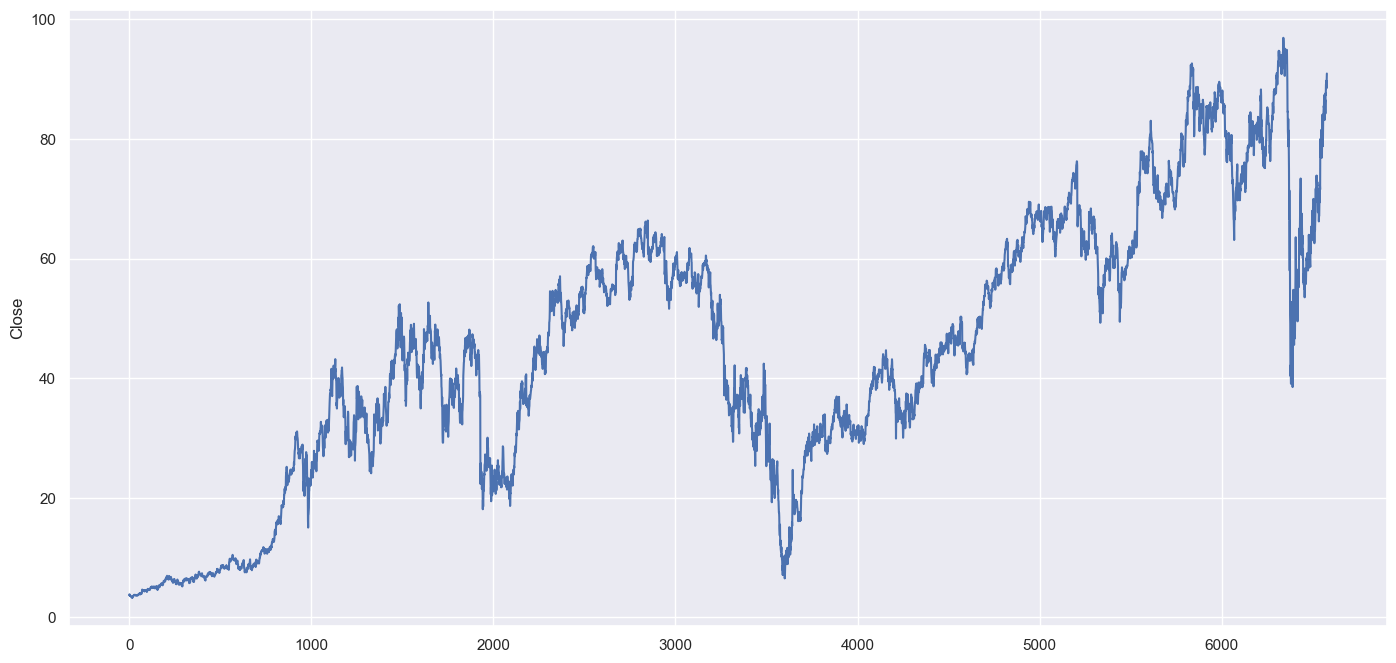

In [18]:
sns.lineplot(X_train["Close"])

<Axes: ylabel='Open'>

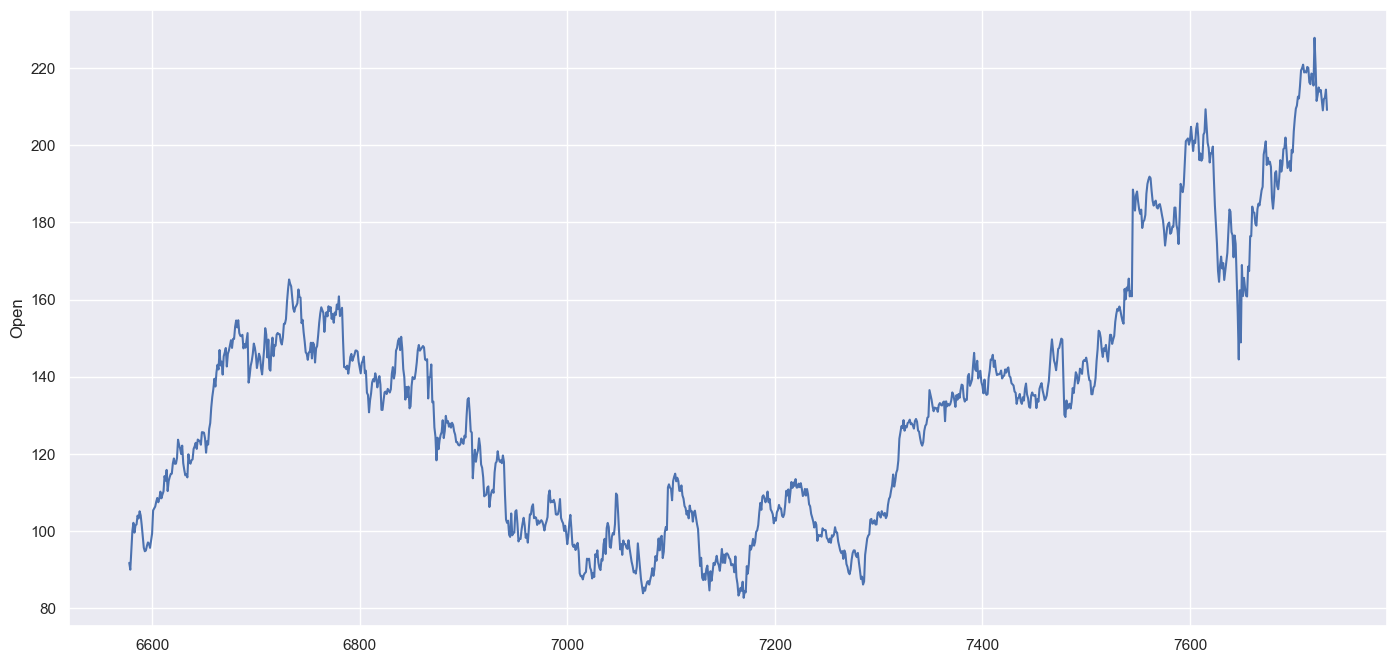

In [19]:
sns.lineplot(X_test["Open"])

In [20]:
X_train

Price,Close,High,Low,Open,Volume,Year,Month,Day,Quarter
0,3.750286,3.779586,3.750286,3.750286,8343900,1994,11,16,4
1,3.808883,3.808883,3.720986,3.750285,4872000,1994,11,17,4
2,3.867481,3.896781,3.808883,3.838182,1468800,1994,11,18,4
3,3.779584,3.896781,3.779584,3.896781,348600,1994,11,21,4
4,3.603792,3.779587,3.603792,3.750288,709800,1994,11,22,4
...,...,...,...,...,...,...,...,...,...
6573,89.527832,89.638242,88.138446,89.242590,960200,2020,12,24,4
6574,89.757866,91.202457,89.656652,90.006296,2138400,2020,12,28,4
6575,88.497284,89.960274,87.843999,89.767049,1902700,2020,12,29,4
6576,90.061493,90.153511,88.304064,88.791728,1405200,2020,12,30,4


In [ ]:
numeric_cols = ['Highd', 'Low', 'Open', 'Volume','Quarter']

In [22]:
# Fitting the scaler on the training data
scaler.fit(X_train[numeric_cols])

MinMaxScaler()

In [23]:
target_scaler = MinMaxScaler()
target_scaler.fit(X_train[["Close"]])

MinMaxScaler()

In [24]:
# Transforming targets
X_train["Close"] = target_scaler.transform(X_train[["Close"]])
X_test["Close"] = target_scaler.transform(X_test[["Close"]])

/var/folders/hl/mtktwmzj3qg4lpdff4wh6j4c0000gn/T/ipykernel_76171/731539716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Close"] = target_scaler.transform(X_train[["Close"]])
/var/folders/hl/mtktwmzj3qg4lpdff4wh6j4c0000gn/T/ipykernel_76171/731539716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Close"] = target_scaler.transform(X_test[["Close"]])


In [25]:
# Transforming both training and testing data
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

/var/folders/hl/mtktwmzj3qg4lpdff4wh6j4c0000gn/T/ipykernel_76171/2076107369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
/var/folders/hl/mtktwmzj3qg4lpdff4wh6j4c0000gn/T/ipykernel_76171/2076107369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [26]:
X_train = X_train.dropna().reset_index(drop=True)
X_test = X_test.dropna().reset_index(drop=True)

In [27]:
X_train[numeric_cols].describe()

Price,High,Low,Open,Volume,Quarter
count,6578.000000,6578.000000,6578.000000,6578.000000,6578.000000
mean,0.444024,0.442117,0.442796,0.030947,0.506892
std,0.238628,0.241392,0.240153,0.035665,0.372325
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.287767,0.282324,0.285012,0.012922,0.333333
50%,0.441124,0.440409,0.440048,0.021768,0.666667
75%,0.616716,0.619497,0.618215,0.035934,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(len(numeric_cols),)),  
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1),  
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

2025-08-10 12:21:07.634420: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-08-10 12:21:07.634445: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-08-10 12:21:07.634448: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-08-10 12:21:07.634464: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-10 12:21:07.634472: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.keras',      # filename to save the model
    monitor='val_loss',   # what metric to watch (usually validation loss)
    save_best_only=True,  # save only if model improves
    mode='min',           # because lower loss is better
    verbose=1             # prints a message when saving
)


In [30]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',    # which metric to watch (validation loss is common)
    patience=25,            # number of epochs to wait before stopping if no improvement
    mode='min',            # because lower loss is better
    restore_best_weights=True,  # put back the best weights after stopping
    verbose=1
)


In [31]:
model.fit(X_train[numeric_cols], X_train["Close"], 
          validation_data=(X_test[numeric_cols], X_test["Close"]),
          epochs=1000, batch_size=128, verbose=1, callbacks=[checkpoint, early_stopping])  # Training the model with validation on test set

Epoch 1/1000


2025-08-10 12:21:07.916317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0497 - mae: 0.1500
Epoch 1: val_loss improved from inf to 0.00078, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0491 - mae: 0.1486 - val_loss: 7.7751e-04 - val_mae: 0.0229
Epoch 2/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2011e-04 - mae: 0.0084
Epoch 2: val_loss improved from 0.00078 to 0.00032, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1942e-04 - mae: 0.0084 - val_loss: 3.2383e-04 - val_mae: 0.0130
Epoch 3/1000
46/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3519e-05 - mae: 0.0046
Epoch 3: val_loss improved from 0.00032 to 0.00032, saving model to best_model.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3516e-05 - mae: 0.0046 - val_loss: 3.2342e-04 - val_mae: 0.0131
Epoch 4/1000
46/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8128e-05 - mae: 0.0049
Epoch 4: val_loss improved from 0.00032 to 0.00031, saving model to best_model.keras
52/52

In [32]:
from tensorflow.keras.models import load_model

model = load_model('best_model.keras') # Load the best model saved during training

In [33]:
model.evaluate(X_train[numeric_cols], X_train["Close"], verbose=1)  # Evaluate the model on the train set

206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4563e-05 - mae: 0.0028


[1.9735698515432887e-05, 0.0031874682754278183]

In [34]:
model.evaluate(X_test[numeric_cols], X_test["Close"], verbose=1)  # Evaluate the model on the test set

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1495e-04 - mae: 0.0084


[0.00012362233246676624, 0.008507019840180874]

# Time to Predict

In [35]:
today = X_test[numeric_cols].iloc[-1:]  # Last row for today's prediction

# Predict price for today
predicted_price = model.predict(today)  
predicted_price = predicted_price.reshape(-1, 1)  # <- store the reshaped result
predicted_price = target_scaler.inverse_transform(predicted_price)  # Inverse transform

# Actual price for today (scaled value)
actual_price = X_test["Close"].iloc[-1]
actual_price = np.array([[actual_price]])  # make it 2D
actual_price = target_scaler.inverse_transform(actual_price)  # Inverse transform

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [36]:
difference = abs(predicted_price - actual_price)[[0]]  # Calculate the difference

In [37]:
print(f"Actual: ${actual_price[0][0]}\nPredicted: ${predicted_price[0][0]}\nDifference: ${difference[0][0]}")  # Print actual and predicted prices

Actual: $208.2299957275391
Predicted: $207.8035430908203
Difference: $0.4264526367187784
